### Bernouli_Trials

In [15]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0
    for i in range(n):
        random_number=np.random.random()#range[0,1]
        if random_number<p:
            n_success+=1
    return n_success

In [14]:
#Example below will show:

#100 transactions, probablity default rate for each transaction is 5%
#simulate*1000

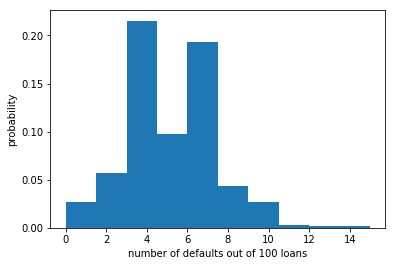

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_defaults=np.empty(1000)

for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)

_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

plt.show()